## Alternative assignment

Here you can find an alternative assignment notebook which does not require py2 or a physical screen.

For starters, please go to __qlearning.py__ file in the current folder and implement q-learning agent by following instructions in the file.

In [3]:
#XVFB will be launched if you run on a server
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

bash: ../xvfb: No such file or directory
env: DISPLAY=:1


### Demo on taxi

Here we use the qlearning agent from before on taxi env from openai gym.
You will need to insert a few agent functions here.

In [4]:
import gym
import math
env = gym.make("Taxi-v2")

from collections import defaultdict
n_actions = env.action_space.n

In [1]:
def make_epsilon_greedy_policy(Q, nA):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.

    Args:
        Q: A dictionary that maps from state -> action-values.
            Each value is a numpy array of length nA (see below)
        epsilon: The probability to select a random action . float between 0 and 1.
        nA: Number of actions in the environment.
    
    Returns:
        A function that takes the observation as an argument and returns
        the probabilities for each action in the form of a numpy array of length nA.
    
    """
    def policy_fn(observation, epsilon):
        A = np.ones(nA, dtype=float) * epsilon / nA
        best_action = np.argmax(Q[observation])
        A[best_action] += (1.0 - epsilon)
        return A
    return policy_fn

MIN_EXPLORE_RATE  = 0.01 
MIN_LEARNING_RATE = 0.1

def get_explore_rate(t):
    return max(MIN_EXPLORE_RATE, min(1, 1.0 - math.log10((t+1)/25)))

def get_learning_rate(t):
    return max(MIN_LEARNING_RATE, min(0.5, 1.0 - math.log10((t+1)/25)))


def state_to_bucket(env,state):
    NUM_BUCKETS = (1, 1, 6, 12)
    STATE_BOUNDS = list(zip(env.observation_space.low, env.observation_space.high)) # (x, x', theta, theta')
#     STATE_BOUNDS[0] = [-0.8, 0.8]
#     STATE_BOUNDS[1] = [-0.5, 0.5]
    STATE_BOUNDS[1] = [-math.radians(6), math.radians(6)]
    STATE_BOUNDS[3] = [-math.radians(50), math.radians(50)]
    bucket_indice = []
    
    for i in range(len(state)):
        if state[i] <= STATE_BOUNDS[i][0]:
            bucket_index = 0
        elif state[i] >= STATE_BOUNDS[i][1]:
            bucket_index = NUM_BUCKETS[i] - 1
        else:                                                                                                                                                       
            # Mapping the state bounds to the bucket array
            bound_width = STATE_BOUNDS[i][1] - STATE_BOUNDS[i][0]
            offset = (NUM_BUCKETS[i]-1) * STATE_BOUNDS[i][0] / bound_width  
            scaling = (NUM_BUCKETS[i]-1)/bound_width
            bucket_index = int(round(scaling*state[i] - offset))
        bucket_indice.append(bucket_index)
    return tuple(bucket_indice)

def play_and_train(env, Q, epsilon, alpha, n_digits=2, discount_factor=0.99 ,t_max=10**4):
    """This function should 
    - run a full game, actions given by agent.getAction(s)
    - train agent using agent.update(...) whenever possible
    - return total reward """
    total_reward = 0.0
    s = env.reset()
    print (s)
    s = state_to_bucket(env,s)
    print (s)
    
    for t in range(t_max):
        policy = make_epsilon_greedy_policy(Q, env.action_space.n)
        action = np.random.choice(np.arange(env.action_space.n), p=policy(s, epsilon))
        new_s, r, done, _ = env.step(action)
        new_s = state_to_bucket(env, new_s)
        Q[s][action] += alpha * (r + discount_factor * Q[new_s][np.argmax(Q[new_s])] - Q[s][action])     
        s = new_s
        total_reward +=r
        if done:
            break
        
    return total_reward
    
        
    

In [2]:
rewards = []
Q = defaultdict(lambda: np.zeros(env.action_space.n))
epsilon = 0.1
for i in range(1000):
    alpha = get_learning_rate(i)
    epsilon = get_explore_rate(i)
    rewards.append(play_and_train(env, Q, epsilon, alpha))
    
    #epsilon *= 0.999
    
    if i %100 ==0:
        clear_output(True)
        plt.plot(rewards)
        plt.show()
        

NameError: name 'defaultdict' is not defined

# Main assignment

Use agent to train efficiently on CartPole-v0

This environment has a continuous number of states, so you will have to group them into bins somehow.

The simplest way is to use `round(x,n_digits)` (or numpy round) to round real number to a given amount of digits.

The tricky part is to get the n_digits right for each state to train effectively.

Note that you don't need to convert state to integers, but to __tuples__ of any kind of values.

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
first state:[ 0.02655116  0.03063669 -0.00581837  0.03495011]


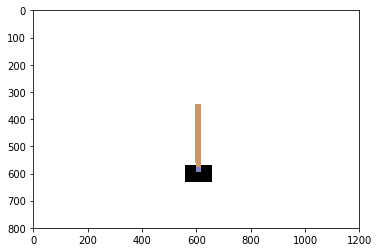

In [27]:
#run xvfb and set %env DISPLAY=:1 if in binder or on a server
env = gym.make("CartPole-v0")
n_actions = env.action_space.n

print("first state:%s"%(env.reset()))
plt.imshow(env.render('rgb_array'))

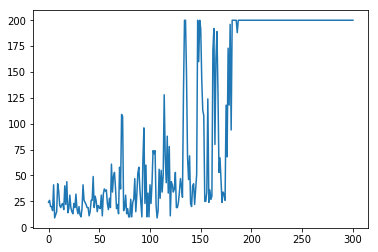

[0.01893221 0.02001435 0.01460105 0.00267863]
(0, 0, 3, 6)
[ 0.01607018  0.01034176 -0.01749175  0.01426646]
(0, 0, 2, 6)
[ 0.04798486  0.01257496 -0.00734794  0.03756505]
(0, 0, 2, 6)
[-0.00010053  0.03363842  0.02448777 -0.04104422]
(0, 0, 3, 5)
[-0.03639121  0.03582879  0.0382275  -0.02781348]
(0, 0, 3, 5)
[ 0.01324107  0.04971453  0.01423834 -0.00567686]
(0, 0, 3, 5)
[-0.03808638 -0.02605414  0.0119587   0.00600813]
(0, 0, 3, 6)
[ 0.04321321  0.02020533 -0.02502609  0.04994166]
(0, 0, 2, 6)
[-0.02978703 -0.00020866  0.03395945  0.01746379]
(0, 0, 3, 6)
[-0.01814164  0.0007818   0.033235    0.01533734]
(0, 0, 3, 6)
[-0.00734205 -0.01946066 -0.01683393  0.0271829 ]
(0, 0, 2, 6)
[ 0.00669789  0.03515873 -0.00240172 -0.0244167 ]
(0, 0, 2, 5)
[ 0.02187465 -0.03958537 -0.02635645  0.03330429]
(0, 0, 2, 6)
[ 0.04287582 -0.02913876  0.0150865  -0.00121783]
(0, 0, 3, 5)
[ 0.00824607 -0.01717886  0.01140306  0.00634138]
(0, 0, 3, 6)
[-0.03586372  0.02882489  0.01946418  0.03939993]
(0, 0, 3,

In [36]:
rewards = []
Q = defaultdict(lambda: np.zeros(env.action_space.n))
epsilon = 0.999
for i in range(400):
    alpha = get_learning_rate(i)
    epsilon = get_explore_rate(i)
    rewards.append(play_and_train(env, Q, epsilon, alpha))
    
    
    if i %100 ==0:
        clear_output(True)
        plt.plot(rewards)
        plt.show()